In [83]:
# !pip install scikit-image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import data
from sklearn.cluster import KMeans
from skimage import io
import scipy.io as sio


import warnings
warnings.filterwarnings("ignore")

# Problem 1

2D plots of data

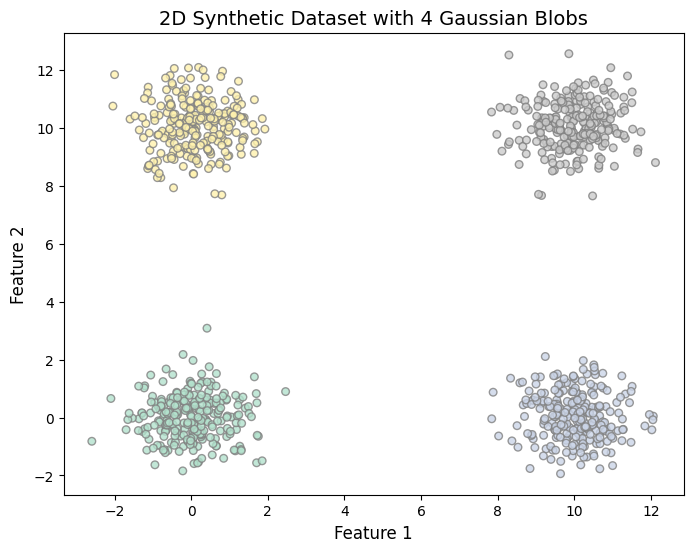

In [84]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate dataset with 4 centers and well-separated clusters
n_samples = 1000
centers = centers = [[0, 0], [10, 0], [0, 10], [10, 10]]  # Coordinates for 4 well-separated centers
cluster_std = 0.8  # Standard deviation of the clusters

X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)



# Plot the dataset using a pastel color palette
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Pastel2', s=30, edgecolor='gray', alpha=0.8)
plt.title('2D Synthetic Dataset with 4 Gaussian Blobs', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.show()

poor k-means initialization

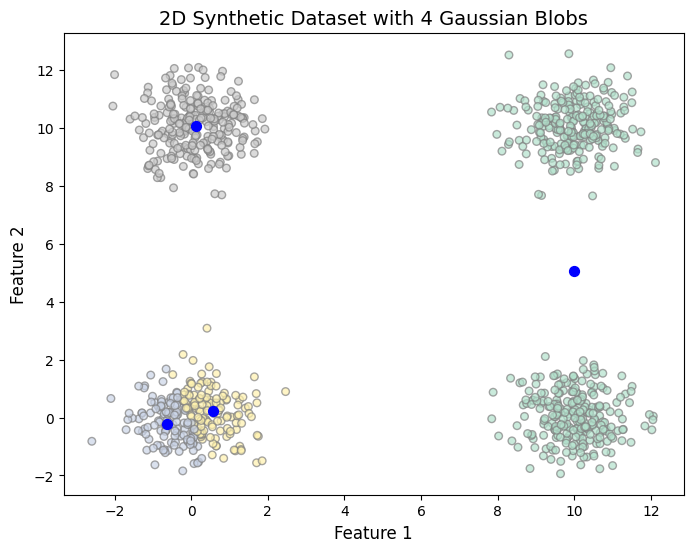

In [85]:
# Poor initialization: all initial centroids are near the center of the dataset
bad_init = np.array([
    [1.5, 0],
    [-2, -2],
    [-0.5, -0.5],
    [0, 0.2]
])

kmeans = KMeans(n_clusters=4, init=bad_init, n_init=10)
kmeans.fit(X)
y_pred = kmeans.labels_

# Plot the clustering results
plt.figure(figsize=(8, 6))
# Plot data points colored by cluster label
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='Pastel2', s=30, edgecolor='grey', alpha=0.7)
plt.title('2D Synthetic Dataset with 4 Gaussian Blobs', fontsize=14)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='blue', marker='o', s=50, label='Final Centroids (k-means++)')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.show()

the results of k-means++

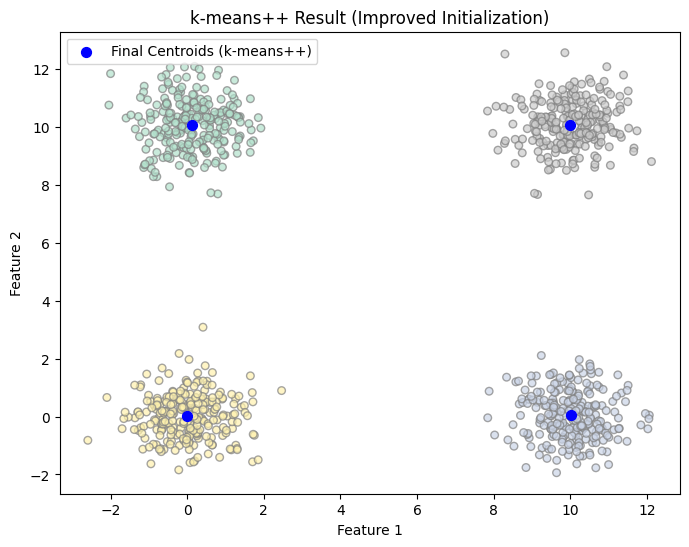

In [86]:
kmeans_pp = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
y_pred_pp = kmeans_pp.fit_predict(X)

# Plot the k-means++ result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred_pp, cmap='Pastel2', s=30, edgecolor='grey', alpha=0.7)
plt.scatter(kmeans_pp.cluster_centers_[:, 0], kmeans_pp.cluster_centers_[:, 1],
            c='blue', marker='o', s=50, label='Final Centroids (k-means++)')
plt.title('k-means++ Result (Improved Initialization)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Problem 5

In [87]:
W = np.array([
[0. , 0. , 0. , 0. , 0.8 , 0.1 , 0.7 ],
[0. , 0. , 0. , 0.95, 0. , 0. , 0. ],
[0. , 0. , 0. , 0. , 0.1 , 0.9 , 0. ],
[0. , 0.95, 0. , 0. , 0. , 0. , 0. ],
[0.8 , 0. , 0.1 , 0. , 0. , 0. , 0.6 ],
[0.1 , 0. , 0.9 , 0. , 0. , 0. , 0. ],
[0.7 , 0. , 0. , 0. , 0.6 , 0. , 0. ]
])
d = W.sum(axis=1)
D = np.diag(d)
D

array([[1.6 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.95, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.95, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.5 , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.3 ]])

A: unnormalized Laplacian

In [88]:
L = D - W
L

array([[ 1.6 ,  0.  ,  0.  ,  0.  , -0.8 , -0.1 , -0.7 ],
       [ 0.  ,  0.95,  0.  , -0.95,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  ,  0.  , -0.1 , -0.9 ,  0.  ],
       [ 0.  , -0.95,  0.  ,  0.95,  0.  ,  0.  ,  0.  ],
       [-0.8 ,  0.  , -0.1 ,  0.  ,  1.5 ,  0.  , -0.6 ],
       [-0.1 ,  0.  , -0.9 ,  0.  ,  0.  ,  1.  ,  0.  ],
       [-0.7 ,  0.  ,  0.  ,  0.  , -0.6 ,  0.  ,  1.3 ]])

B: Compute the eigenvalues of the unnormalized Laplacian and plot them on the
number line

Eigenvalues of the unnormalized Laplacian: 
 [-1.38229146e-16  1.05944839e-16  1.63607922e-01  1.87543528e+00
  1.90000000e+00  1.97190843e+00  2.38904836e+00]


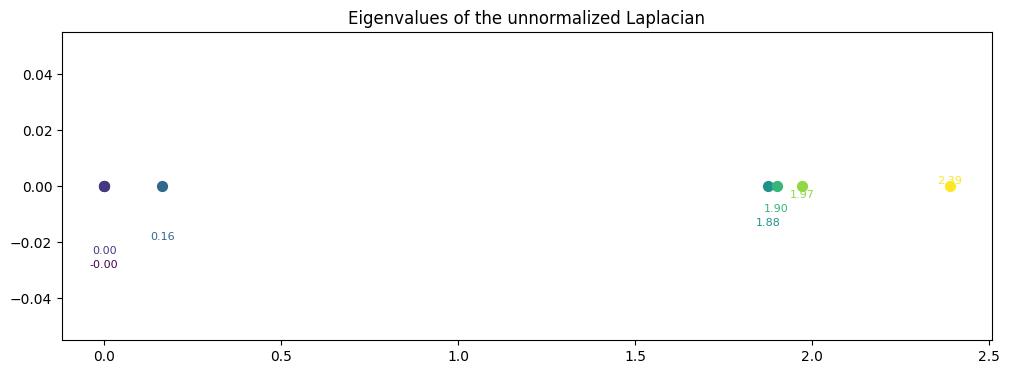

In [89]:
vals, vecs = np.linalg.eig(L)
vals.sort()
print("Eigenvalues of the unnormalized Laplacian: \n",vals)
eigvals = vals

plt.figure(figsize=(12, 4))
y = np.zeros_like(eigvals)
colors = plt.cm.viridis(np.linspace(0, 1, len(eigvals)))

offsets = [0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04]
for i, (x, c) in enumerate(zip(eigvals, colors)):
    plt.scatter(x, 0, color=c, s=50)      # plot
    plt.text(x, -0.04+offsets[i], f'{x:.2f}', color=c,  # text
             ha='center', va='bottom', fontsize=8)
plt.title('Eigenvalues of the unnormalized Laplacian')
plt.show()


C: Due to Multiplicity of the “0” eigenvalue = number of connected components, the answer to part B suggests that there are 2 connected components.

D:Add 1 to the answer to part (C) and let us find that many clusters by spectral
clustering. Organize the necessary eigenvectors and render the given data in terms of these eigenvectors and find the desired number of clusters. Present the final clustering, i.e., for each cluster list the elements that are assigned to that cluster.

In [90]:
idx = np.argsort(vals)
vals_sorted = vals[idx]
vecs_sorted = vecs[:, idx]

print("Sorted Eigenvalues of L:")
print(vecs_sorted)


k = 3

# get minimum 3
X = vecs_sorted[:, :k]

# k means
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)


clusters = {}
for node, label in enumerate(labels):
    clusters.setdefault(label, []).append(node)

print("\nFinal clustering assignments:")
for cluster, nodes in clusters.items():
    print(f"Cluster {cluster}: {nodes}")


Sorted Eigenvalues of L:
[[ 7.64494296e-01  3.49252937e-01  2.92864065e-01 -8.83260805e-02
  -2.35960239e-01  4.43763850e-01  1.56162476e-15]
 [-4.64873142e-17  1.92082888e-16  2.03028654e-16 -6.71001063e-15
   6.00672052e-01 -8.76590710e-02  7.07106781e-01]
 [ 1.34835544e-01 -5.47327524e-01 -1.79883116e-01  6.70741397e-01
  -2.35960239e-01  4.43763850e-01 -7.42716159e-15]
 [ 1.92275944e-17  1.89727224e-16 -1.52390861e-16  6.84396147e-15
   6.00672052e-01 -8.76590710e-02 -7.07106781e-01]
 [-5.91324882e-01  3.46950029e-01  5.20327961e-01  2.43350311e-01
  -2.35960239e-01  4.43763850e-01 -8.25364778e-16]
 [-1.42400671e-01 -5.47194898e-01  1.36441246e-01 -6.79473016e-01
  -2.35960239e-01  4.43763850e-01  7.14977487e-15]
 [-1.65604287e-01  3.98319455e-01 -7.69750156e-01 -1.46292613e-01
  -2.35960239e-01  4.43763850e-01 -5.11939912e-16]]

Final clustering assignments:
Cluster 2: [0]
Cluster 0: [1, 2, 3, 5, 6]
Cluster 1: [4]


# Problem 7

In [91]:
def kmeans_segmentation_subplot(image, title="Image"):
    k_values = [2, 3, 5, 8, 10]
    len_k = len(k_values)

    fig, axes = plt.subplots(1, len_k+1, figsize=(4*(len_k+1), 4))
    fig.suptitle(f"K-Means Segmentation - {title}", fontsize=14)

    axes[-1].imshow(image)
    axes[-1].set_title("Original")
    axes[-1].axis("off")


    for i, k in enumerate(k_values):
        if image.ndim == 2:
            pixel_values = image.reshape((-1, 1))  # Grayscale
        else:
            pixel_values = image.reshape((-1, image.shape[-1]))  # RGB
        pixel_values = np.float32(pixel_values)

        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(pixel_values)
        labels = kmeans.labels_

        segmented_image = labels.reshape(image.shape[0], image.shape[1])

        cmap = plt.cm.get_cmap("tab20", k)
        im = axes[i].imshow(segmented_image, cmap=cmap, vmin=0, vmax=k - 1)
        axes[i].set_title(f"K={k}")
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()


def groundTruth_subplot(mat_data, title="image"):
  print(mat_data.keys())
  gt = mat_data['groundTruth']

  print("groundTruth shape:", gt.shape)
  print("groundTruth type:", type(gt[0,0]))

  N = gt.shape[1]
  fig, axes = plt.subplots(1, N, figsize=(4*N, 4))
  fig.suptitle(f"GroundTruth Segmentation - {title}", fontsize=14)

  for i in range(N):
    segmentation = gt[0, i]['Segmentation'][0, 0]
    unique_ids = np.unique(segmentation)
    num_clusters = unique_ids.size
    cmap = plt.cm.get_cmap("tab20", num_clusters)
    ax = axes[i] if N > 1 else axes  # 如果只有一个图，axes 不再是数组
    im = ax.imshow(segmentation, cmap=cmap)
    ax.set_title(f"Segmentation K={num_clusters}")
    ax.axis("off")

  plt.tight_layout()
  plt.show()

In [92]:
from sklearn.metrics import adjusted_rand_score
from skimage.metrics import adapted_rand_error, variation_of_information

def evaluate(image, mat_data, k, title="image"):
  pixel_values = image.reshape((-1, image.shape[-1]))
  pixel_values = np.float32(pixel_values)
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(pixel_values)
  labels = kmeans.labels_
  pred_seg = labels.reshape(image.shape[0], image.shape[1])

  gt = mat_data['groundTruth']
  N = gt.shape[1]
  for i in range(N):
    segmentation = gt[0, i]['Segmentation'][0, 0]
    unique_ids = np.unique(segmentation)
    num_clusters = unique_ids.size
    if num_clusters == k:
      gt_seg = segmentation

  #print("Ground Truth shape:", gt_seg.shape)
  #print("Predicted shape:", pred_seg.shape)

  ari = adjusted_rand_score(gt_seg.ravel(), pred_seg.ravel())
  are, prec, rec = adapted_rand_error(gt_seg, pred_seg)
  vi_split, vi_merge = variation_of_information(gt_seg, pred_seg)
  vi_total = vi_split + vi_merge



  print(f"Image: {title}, K={k}")
  print(f" ARI={ari:.4f}, ARE={are:.4f}, VI={vi_total:.4f} (split={vi_split:.4f}, merge={vi_merge:.4f})\n")




Image 3036

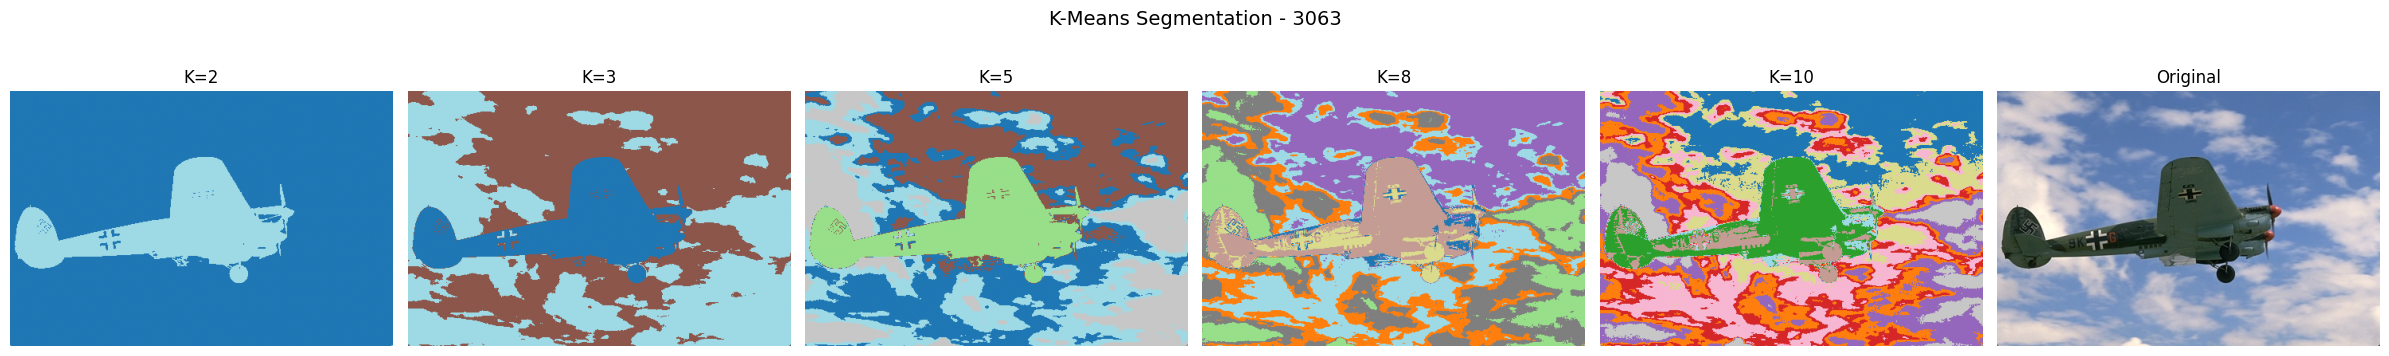

In [94]:
# Image Case 1
image_3063 = io.imread("/content/sample_data/3063.jpg")
kmeans_segmentation_subplot(image_3063, title="3063")

dict_keys(['__header__', '__version__', '__globals__', 'groundTruth'])
groundTruth shape: (1, 6)
groundTruth type: <class 'numpy.ndarray'>


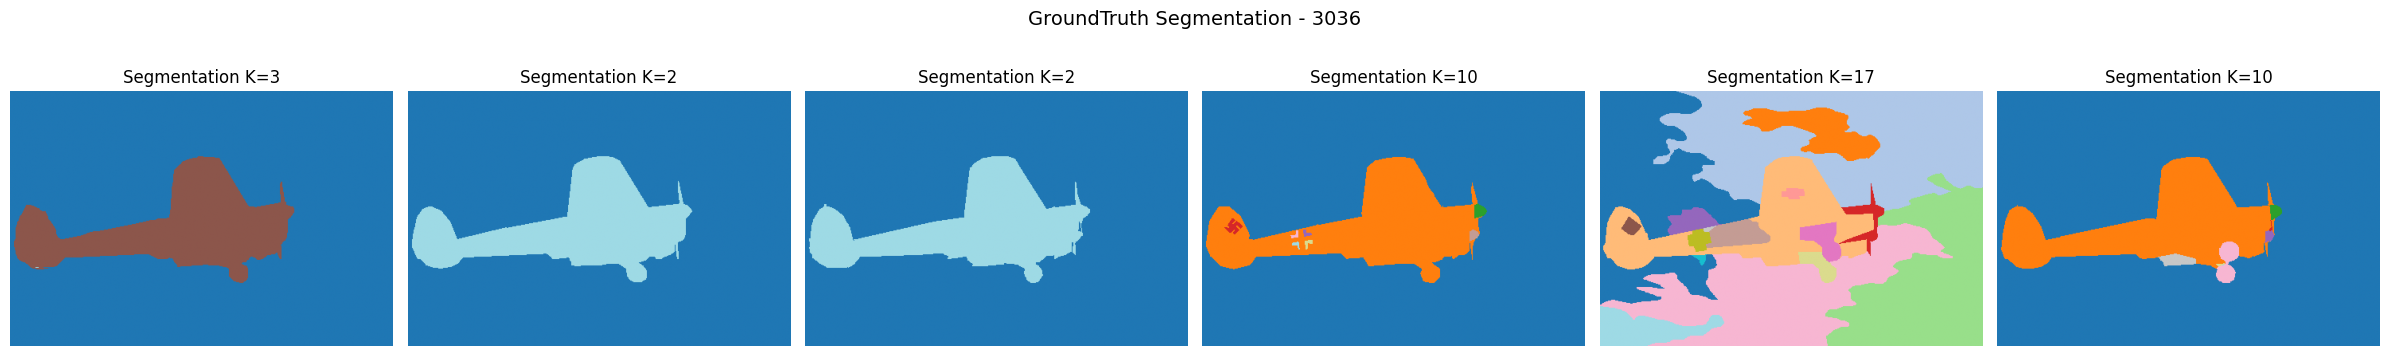

In [95]:
mat_data_3063 = sio.loadmat('/content/sample_data/3063.mat')
groundTruth_subplot(mat_data_3063, title="3036")

Evaluation

In [96]:
evaluate(image_3063, mat_data_3063, k=2, title="3063")
evaluate(image_3063, mat_data_3063, k=3, title="3063")
evaluate(image_3063, mat_data_3063, k=10, title="3063")

Image: 3063, K=2
 ARI=0.9455, ARE=0.0139, VI=0.1481 (split=0.0643, merge=0.0839)

Image: 3063, K=3
 ARI=0.3321, ARE=0.3264, VI=1.0140 (split=0.9162, merge=0.0979)

Image: 3063, K=10
 ARI=0.0870, ARE=0.7248, VI=2.6627 (split=2.5511, merge=0.1116)



Image 8068

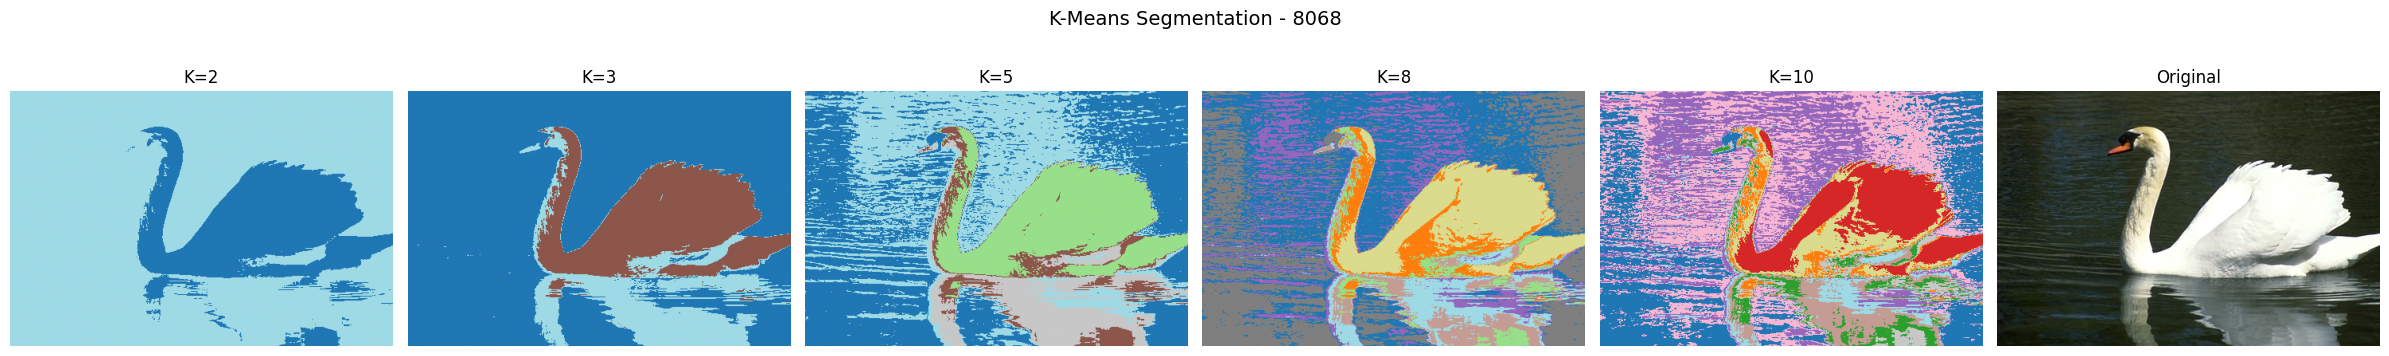

In [98]:
# Image Case 8068
image_8068 = io.imread("/content/sample_data/8068.jpg")
kmeans_segmentation_subplot(image_8068, title="8068")

dict_keys(['__header__', '__version__', '__globals__', 'groundTruth'])
groundTruth shape: (1, 5)
groundTruth type: <class 'numpy.ndarray'>


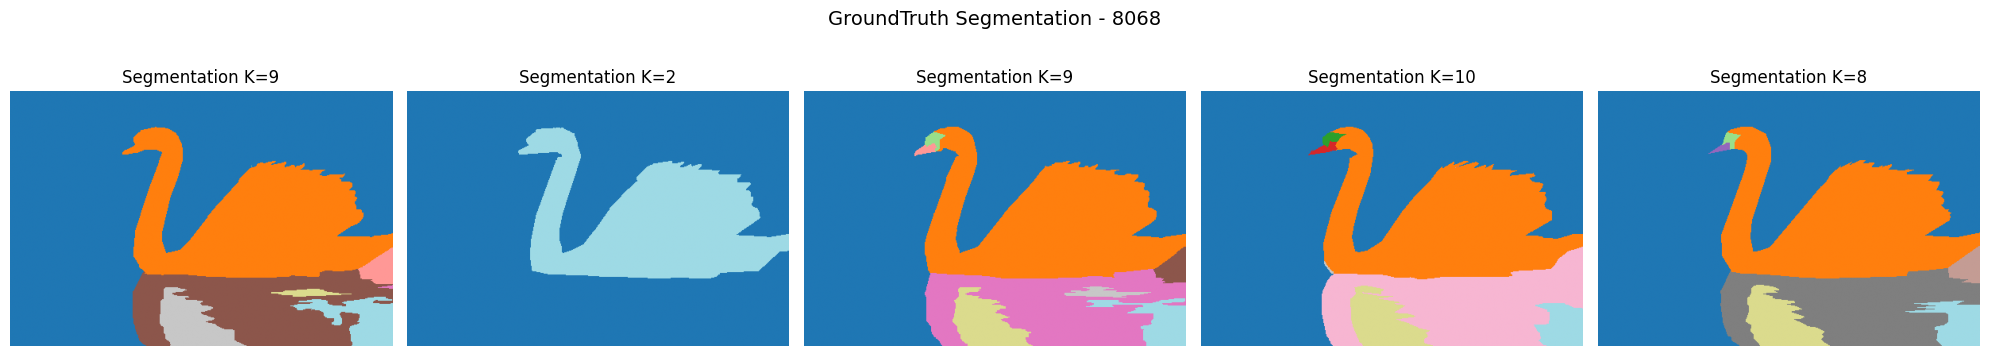

In [99]:
mat_data_8068 = sio.loadmat('/content/sample_data/8068.mat')
groundTruth_subplot(mat_data_8068, title="8068")

In [100]:
evaluate(image_8068, mat_data_8068, k=2, title="8068")
evaluate(image_8068, mat_data_8068, k=10, title="8068")

Image: 8068, K=2
 ARI=0.7804, ARE=0.0758, VI=0.5630 (split=0.2796, merge=0.2834)

Image: 8068, K=10
 ARI=0.2915, ARE=0.5384, VI=2.5668 (split=1.9021, merge=0.6647)



Image 70011

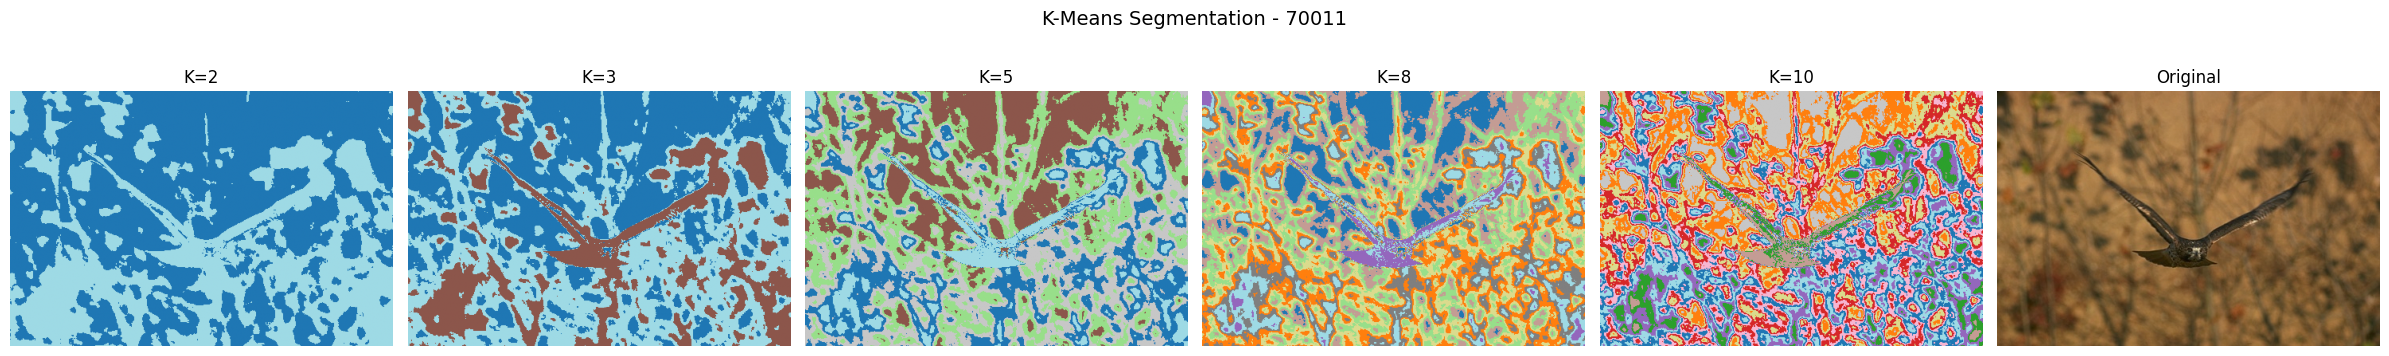

In [102]:
# Image Case 70011
image_70011 = io.imread("/content/sample_data/70011.jpg")
kmeans_segmentation_subplot(image_70011, title="70011")

dict_keys(['__header__', '__version__', '__globals__', 'groundTruth'])
groundTruth shape: (1, 6)
groundTruth type: <class 'numpy.ndarray'>


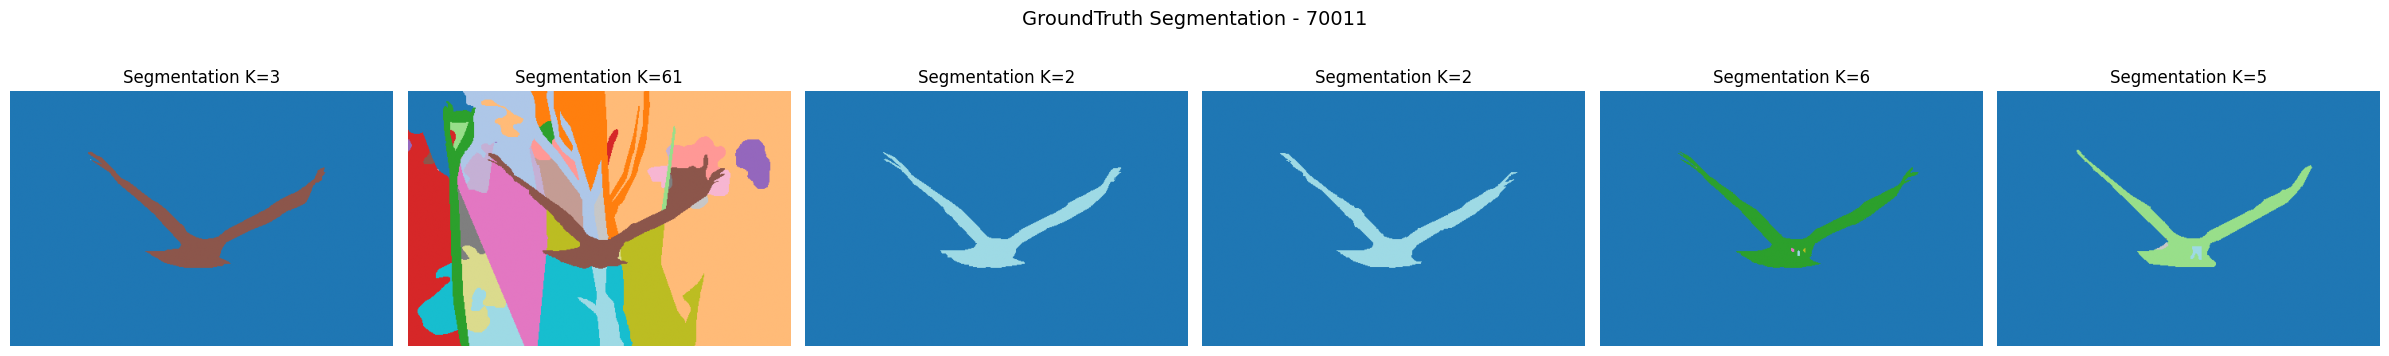

In [103]:
mat_data_70011 = sio.loadmat('/content/sample_data/70011.mat')
groundTruth_subplot(mat_data_70011, title="70011")

In [104]:
evaluate(image_70011, mat_data_70011, k=2, title="70011")
evaluate(image_70011, mat_data_70011, k=5, title="70011")

Image: 70011, K=2
 ARI=0.0344, ARE=0.3253, VI=1.1562 (split=0.9429, merge=0.2132)

Image: 70011, K=5
 ARI=0.0247, ARE=0.6244, VI=2.3243 (split=2.1474, merge=0.1770)



The segmentation shows different segementation accuracy as the value of k changes. With smaller k values, such as 2 and 3, different regions or backgrounds might not be adequately distinguished, leading to better performance, while larger k values, such as 8 and 10, may split a single area into multiple regions, resulting in worse performance. In the context, using only RGB information makes it difficult to capture differences in complex scenes, failing to fully reflect the image's segmentations. Overall, k-means, as a simple unsupervised method, can achieve reasonable results in scenarios with distinct color contrasts but is limited in more complex scenes and should be viewed as a preliminary segmentation approach.

# Problem 8

In [105]:
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [106]:
data = np.loadtxt('/content/sample_data/Aggregation.data.gz')
labels = np.loadtxt('/content/sample_data/Aggregation.labels.gz')

In [107]:
def cluster_and_evaluate(data, true_labels, n_clusters=7):
    """
    do k-means, hierarchical, spectral，compute ARI & NMI
    """

    # 1. K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_preds = kmeans.fit_predict(data)

    # 2. Hierarchical Clustering
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    hierarchical_preds = hierarchical.fit_predict(data)

    # 3. Spectral Clustering
    spectral = SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors')
    spectral_preds = spectral.fit_predict(data)

    # ARI and NMI
    results = {}
    for method_name, preds in zip(["k-means", "hierarchical", "spectral"],
                                  [kmeans_preds, hierarchical_preds, spectral_preds]):
        ari = adjusted_rand_score(true_labels, preds)
        nmi = normalized_mutual_info_score(true_labels, preds)
        results[method_name] = {
            "preds": preds,
            "ARI": ari,
            "NMI": nmi
        }

    return results

def plot_clusters(data, clustering_results):

    fig, axes = plt.subplots(1, 4, figsize=(15, 4))

    for ax, (method_name, info) in zip(axes, clustering_results.items()):
        preds = info["preds"]
        ari = info["ARI"]
        nmi = info["NMI"]

        scatter = ax.scatter(data[:, 0], data[:, 1], c=preds, cmap='tab10')
        ax.set_title(f"{method_name}\nARI={ari:.3f}, NMI={nmi:.3f}")
        ax.axis("equal")
    # plot ground truth
    ax_gt = axes[-1]
    sc_gt = ax_gt.scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10')
    ax_gt.set_title("Ground Truth")
    ax_gt.axis("equal")

    plt.suptitle("Clustering Results on Aggregation Dataset", fontsize=14)
    plt.tight_layout()
    plt.show()


K-MEANS: ARI=0.7350, NMI=0.8143
HIERARCHICAL: ARI=0.9358, NMI=0.9418
SPECTRAL: ARI=0.8476, NMI=0.9010


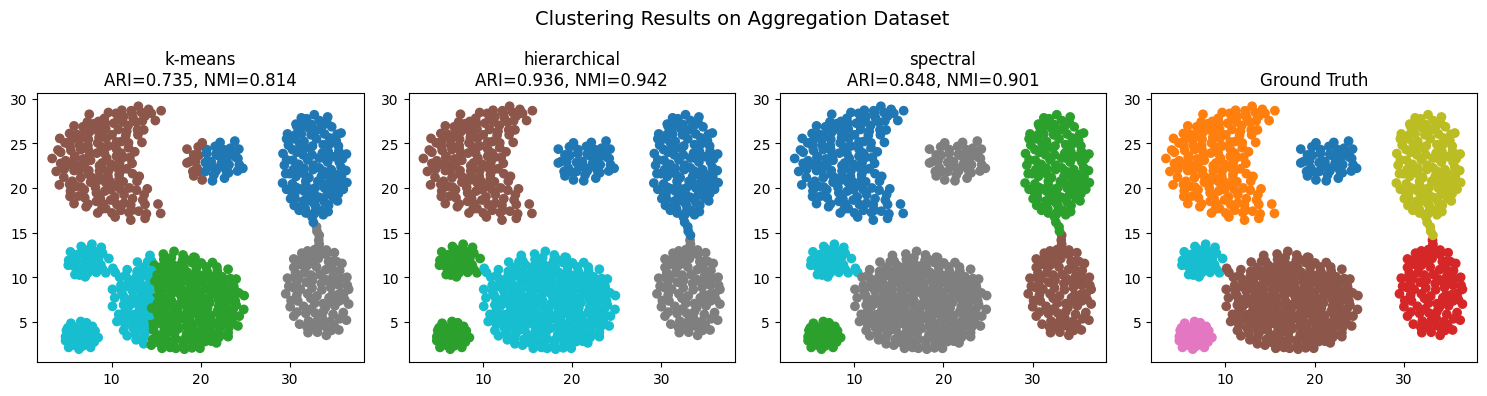

In [108]:
# k = 5
n_clusters = 5
results = cluster_and_evaluate(data, labels, n_clusters=n_clusters)

# evaluate
for method_name, info in results.items():
    print(f"{method_name.upper()}: ARI={info['ARI']:.4f}, NMI={info['NMI']:.4f}")

# plot
plot_clusters(data, results)

K-MEANS: ARI=0.7622, NMI=0.8792
HIERARCHICAL: ARI=1.0000, NMI=1.0000
SPECTRAL: ARI=0.4592, NMI=0.7231


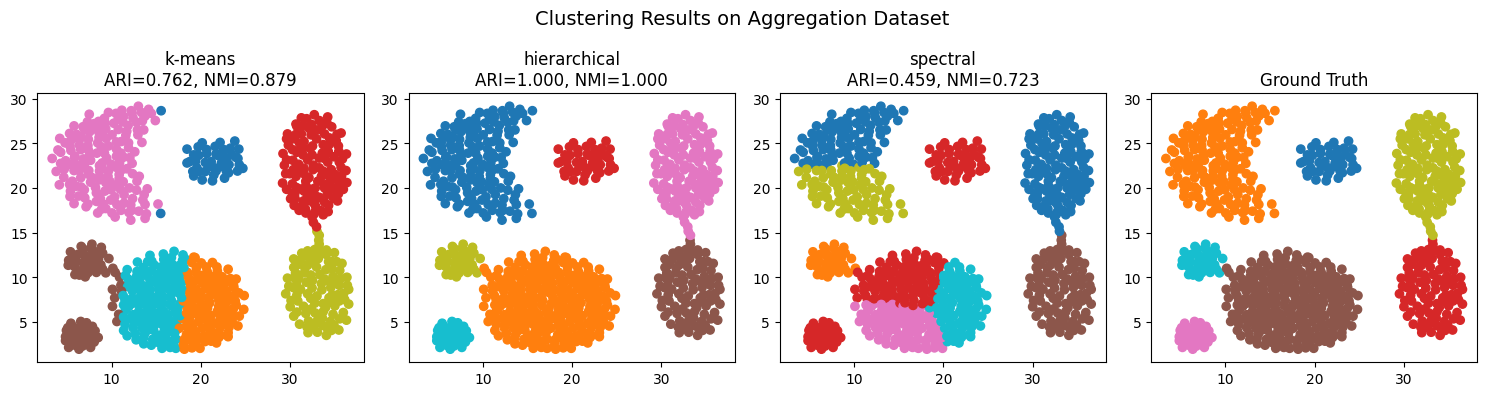

In [109]:
# k = 7
n_clusters = 7
results = cluster_and_evaluate(data, labels, n_clusters=n_clusters)

# evaluate
for method_name, info in results.items():
    print(f"{method_name.upper()}: ARI={info['ARI']:.4f}, NMI={info['NMI']:.4f}")

# plot
plot_clusters(data, results)

K-MEANS: ARI=0.5984, NMI=0.8246
HIERARCHICAL: ARI=0.7126, NMI=0.8876
SPECTRAL: ARI=0.6268, NMI=0.8558


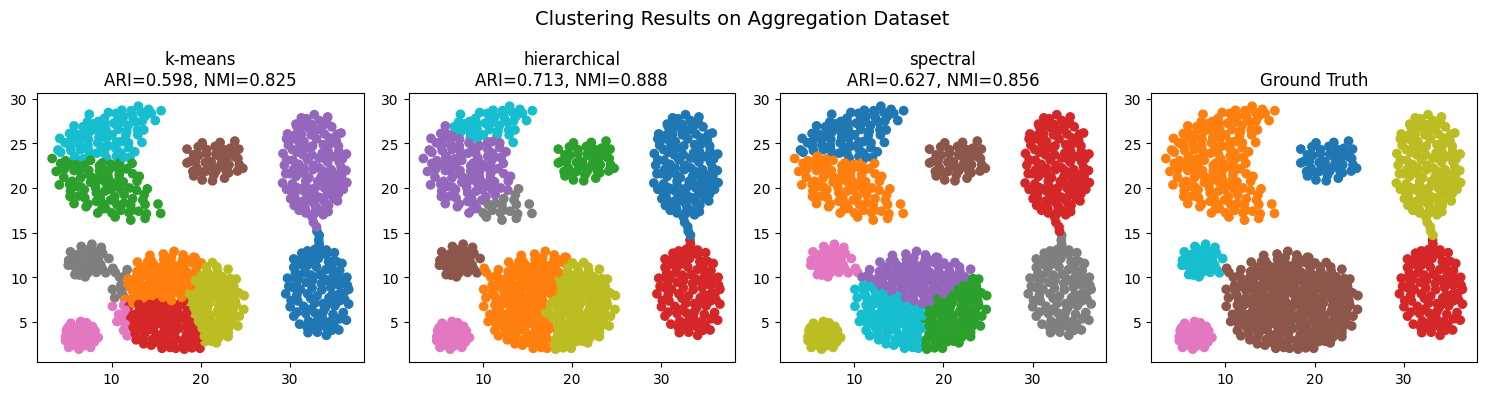

In [110]:
# k = 10
n_clusters = 10
results = cluster_and_evaluate(data, labels, n_clusters=n_clusters)

# evaluate
for method_name, info in results.items():
    print(f"{method_name.upper()}: ARI={info['ARI']:.4f}, NMI={info['NMI']:.4f}")

# plot
plot_clusters(data, results)